In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score)

Loading in the Dataset

In [20]:
iris_data, iris_target =load_iris(return_X_y=True)
iris_df = pd.DataFrame(data=iris_data, columns=['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)'])
iris_df['Target'] = iris_target

iris_df.sample(5)


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Target
140,6.7,3.1,5.6,2.4,2
8,4.4,2.9,1.4,0.2,0
54,6.5,2.8,4.6,1.5,1
40,5.0,3.5,1.3,0.3,0
33,5.5,4.2,1.4,0.2,0


Data Statistics

In [21]:
print(f"Number of rows: {iris_df.shape[0]}")
print(f"Number of columns: {iris_df.shape[1]}")

Number of rows: 150
Number of columns: 5


In [22]:
iris_df.count(axis=0)  #Seeing if there are any NaN or NA

Sepal Length (cm)    150
Sepal Width (cm)     150
Petal Length (cm)    150
Petal Width (cm)     150
Target               150
dtype: int64

In [23]:
print("Stats:\n")
print("MEAN:")
print(iris_df.mean())
print("\nMEDIAN:")
print(iris_df.median())
print("\nMAX:")
print(iris_df.max())
print("\nMIN:")
print(iris_df.min())


Stats:

MEAN:
Sepal Length (cm)    5.843333
Sepal Width (cm)     3.057333
Petal Length (cm)    3.758000
Petal Width (cm)     1.199333
Target               1.000000
dtype: float64

MEDIAN:
Sepal Length (cm)    5.80
Sepal Width (cm)     3.00
Petal Length (cm)    4.35
Petal Width (cm)     1.30
Target               1.00
dtype: float64

MAX:
Sepal Length (cm)    7.9
Sepal Width (cm)     4.4
Petal Length (cm)    6.9
Petal Width (cm)     2.5
Target               2.0
dtype: float64

MIN:
Sepal Length (cm)    4.3
Sepal Width (cm)     2.0
Petal Length (cm)    1.0
Petal Width (cm)     0.1
Target               0.0
dtype: float64


DATA VISULISATION

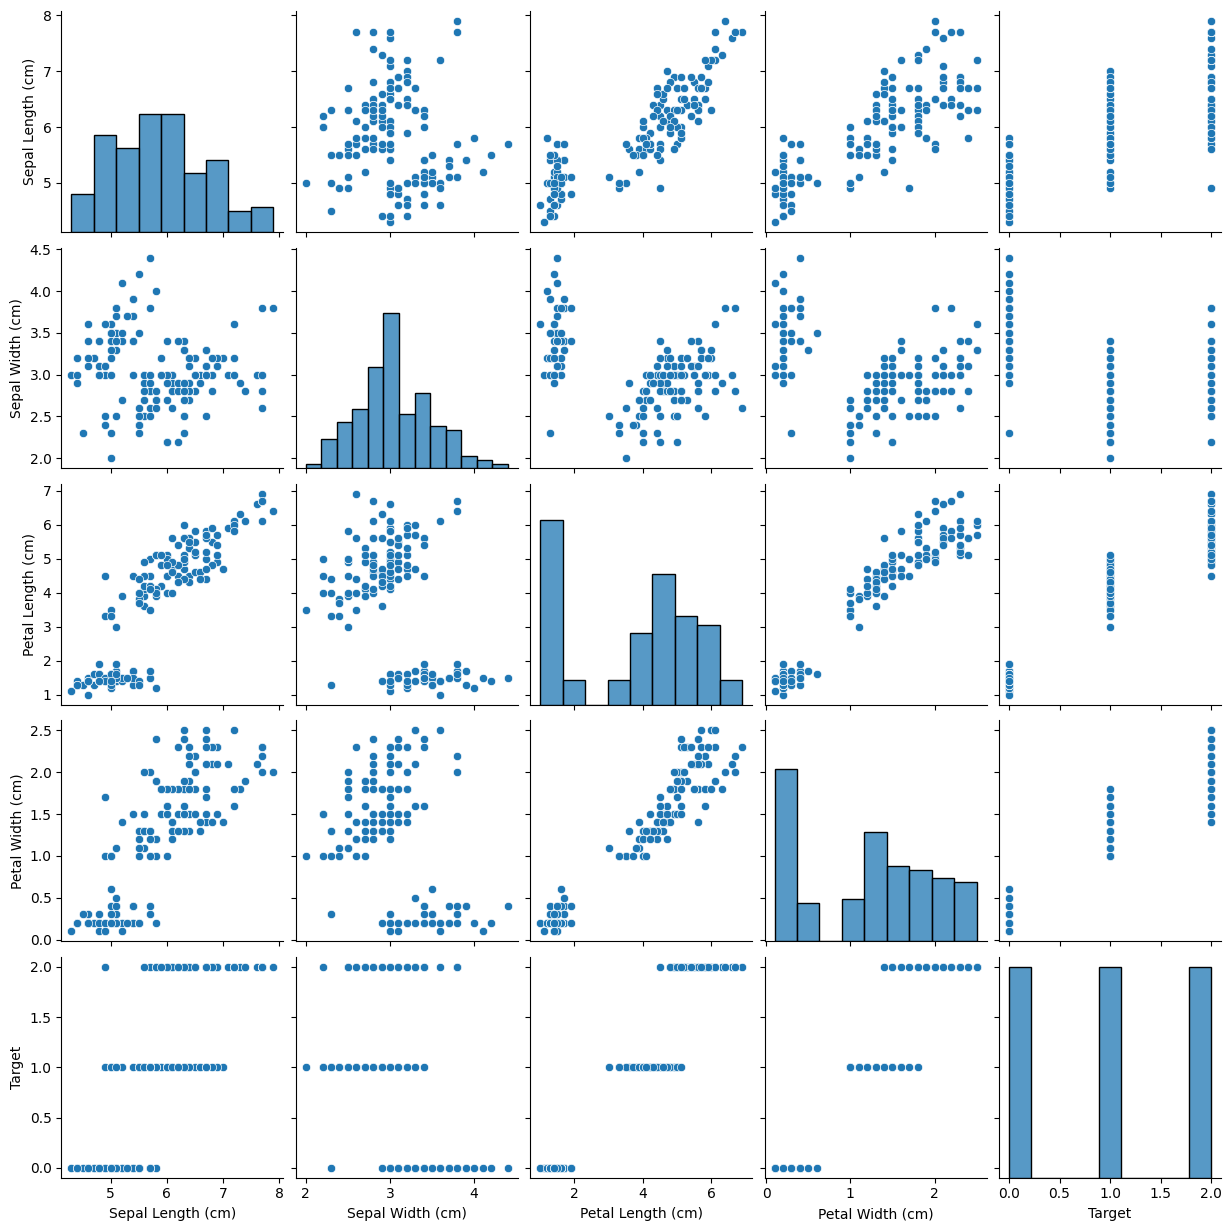

In [24]:
sea.pairplot(data=iris_df)

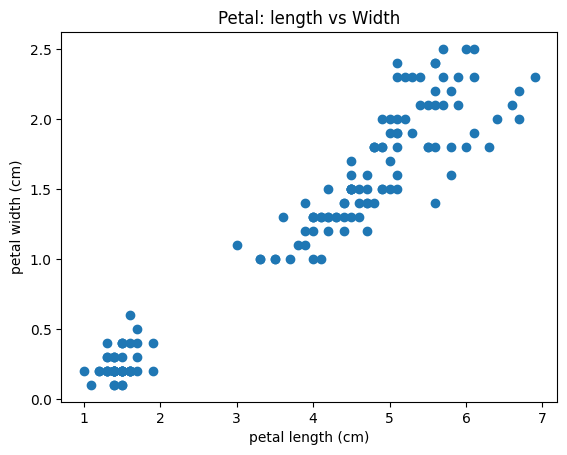

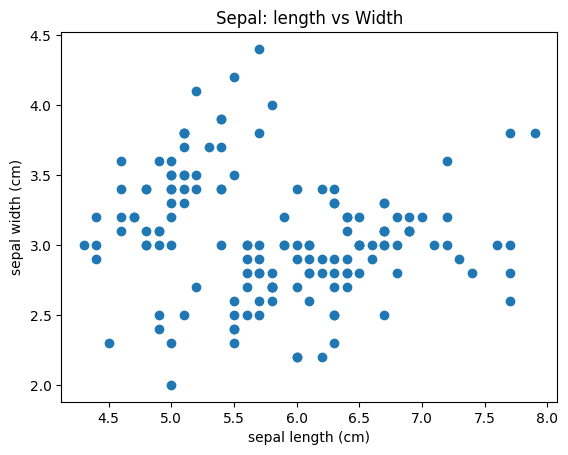

In [26]:
plt.scatter(iris_df['Petal Length (cm)'], iris_df['Petal Width (cm)'])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Petal: length vs Width")
plt.show()

plt.scatter(iris_df['Sepal Length (cm)'], iris_df['Sepal Width (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Sepal: length vs Width")
plt.show()

Splitting The Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data, iris_target,train_size=0.8, test_size=0.2, random_state=42)

Implementing the Machine Learning Model

In [28]:
#Logistic Regression
lr = LinearRegression()

lr_model = lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

for i in range(0, len(Y_pred)):
    Y_pred[i] = round(Y_pred[i])

print(Y_pred)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


Confirming The Predictions, Manually

In [29]:
test_pred_df = pd.DataFrame(X_test, columns=['Petal Length (cm)','Petal Width (cm)','Sepal Length (cm)','Sepal Width (cm)'])
test_pred_df['Target'] = Y_pred

test_pred_df.head(30)

,Petal Length (cm),Petal Width (cm),Sepal Length (cm),Sepal Width (cm),Target
0,6.1,2.8,4.7,1.2,1.0
1,5.7,3.8,1.7,0.3,0.0
2,7.7,2.6,6.9,2.3,2.0
3,6.0,2.9,4.5,1.5,1.0
4,6.8,2.8,4.8,1.4,1.0
5,5.4,3.4,1.5,0.4,0.0
6,5.6,2.9,3.6,1.3,1.0
7,6.9,3.1,5.1,2.3,2.0
8,6.2,2.2,4.5,1.5,1.0
9,5.8,2.7,3.9,1.2,1.0


Evaluvating the Model

In [30]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = root_mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print("R2 Score", r2)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("Mean Absolute Error", mae)

R2 Score 1.0
Mean Squared Error 0.0
Root Mean Squared Error 0.0
Mean Absolute Error 0.0
